In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
m = pd.read_pickle('../data/manufacturer')

In [4]:
df = pd.read_pickle('../data/wss_n1')

In [11]:
itap = pd.DataFrame(itapudid).reset_index(drop = True)

In [12]:
new = pd.merge(itap, m, how='left', on='itapudid')

In [13]:
new

,itapudid,ebs_mfg
0,170510090001DC92483A3,Knorr Bremse
1,170510091001DC924DABE,Knorr Bremse
2,170540041001DC92C7AD4,Knorr Bremse
3,170540044001DC92C84AC,Knorr Bremse
4,170540048001DC92C8827,Knorr Bremse
5,170540049001DC92482AA,Knorr Bremse
6,170540057001DC924818A,Knorr Bremse
7,170540058001DC9248151,Knorr Bremse
8,170540060001DC924C71D,Knorr Bremse
9,170540064001DC915C8A2,Knorr Bremse


In [5]:
result = df.groupby('itapudid').count().reset_index()
itapudid = result[result.max1stdetectwssc>3000].itapudid

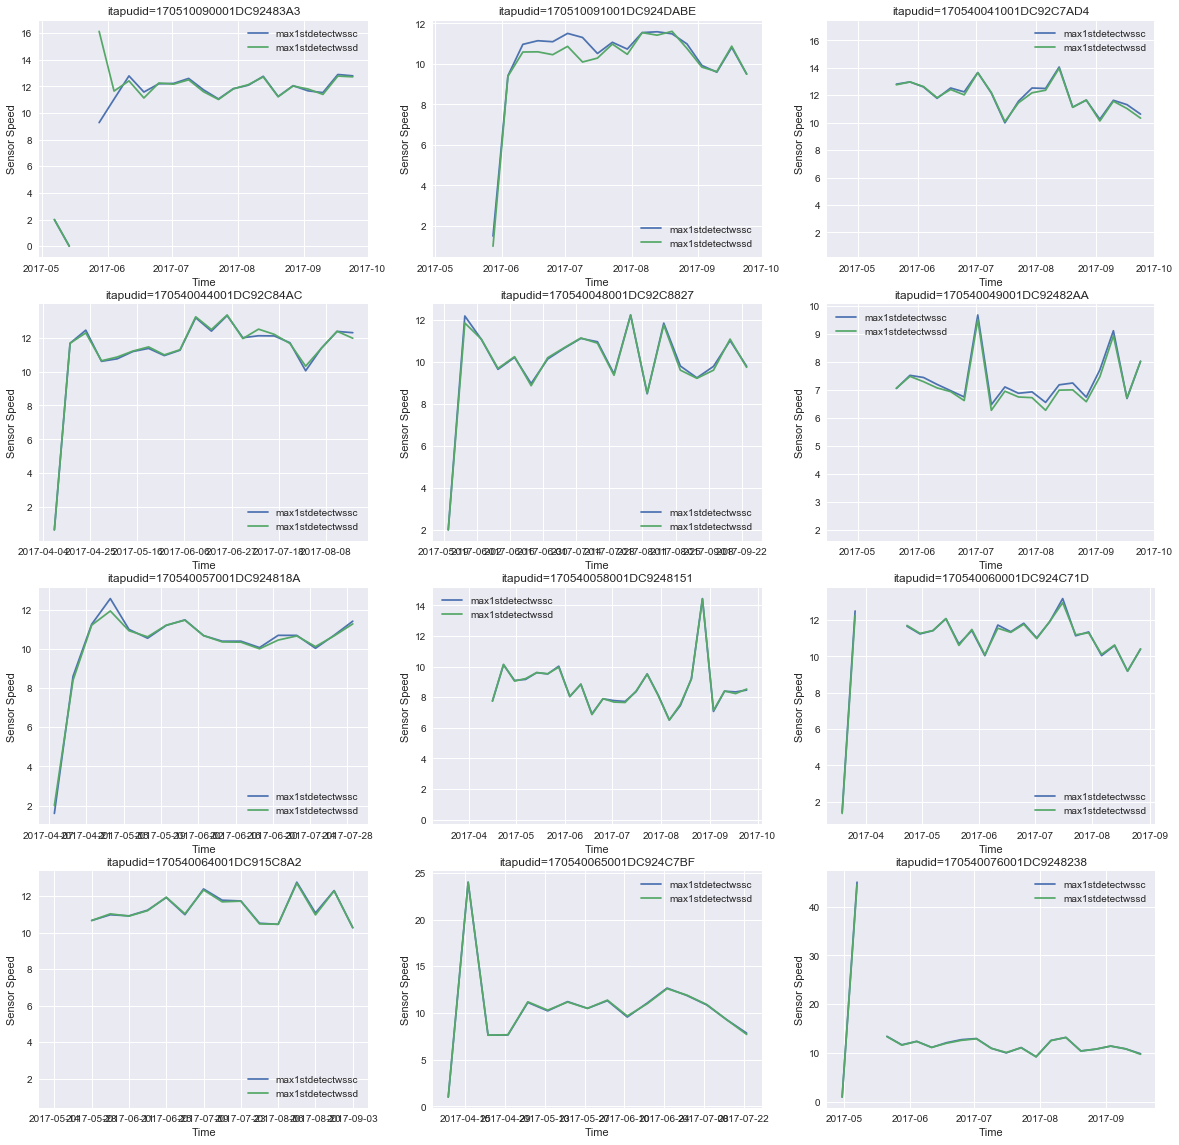

In [4]:
num = 1
plt.figure(figsize=(20, 20));
for i in itapudid:
    df1 = df[df['itapudid'] == i]
    df1 = df1.sort_values(['eventtime']).dropna(axis=0, how='any').reset_index(drop = True)
    df1 = df1[df1['eventtime']!='1970-01-01'].reset_index(drop = True)
    df1 = df1.set_index(pd.DatetimeIndex(df1['eventtime']))
    df1 = df1.resample("W").mean()
    df1 = df1[['max1stdetectwssc', 'max1stdetectwssd']]
    plt.subplot(4,3,num)
    plt.plot(df1.index.values, df1['max1stdetectwssc'], label='max1stdetectwssc')
    plt.plot(df1.index.values, df1['max1stdetectwssd'], label='max1stdetectwssd')
    plt.legend()
    plt.ylabel('Sensor Speed')
    plt.xlabel('Time')
    plt.title('itapudid=%s' % (i))
    num += 1
plt.show()

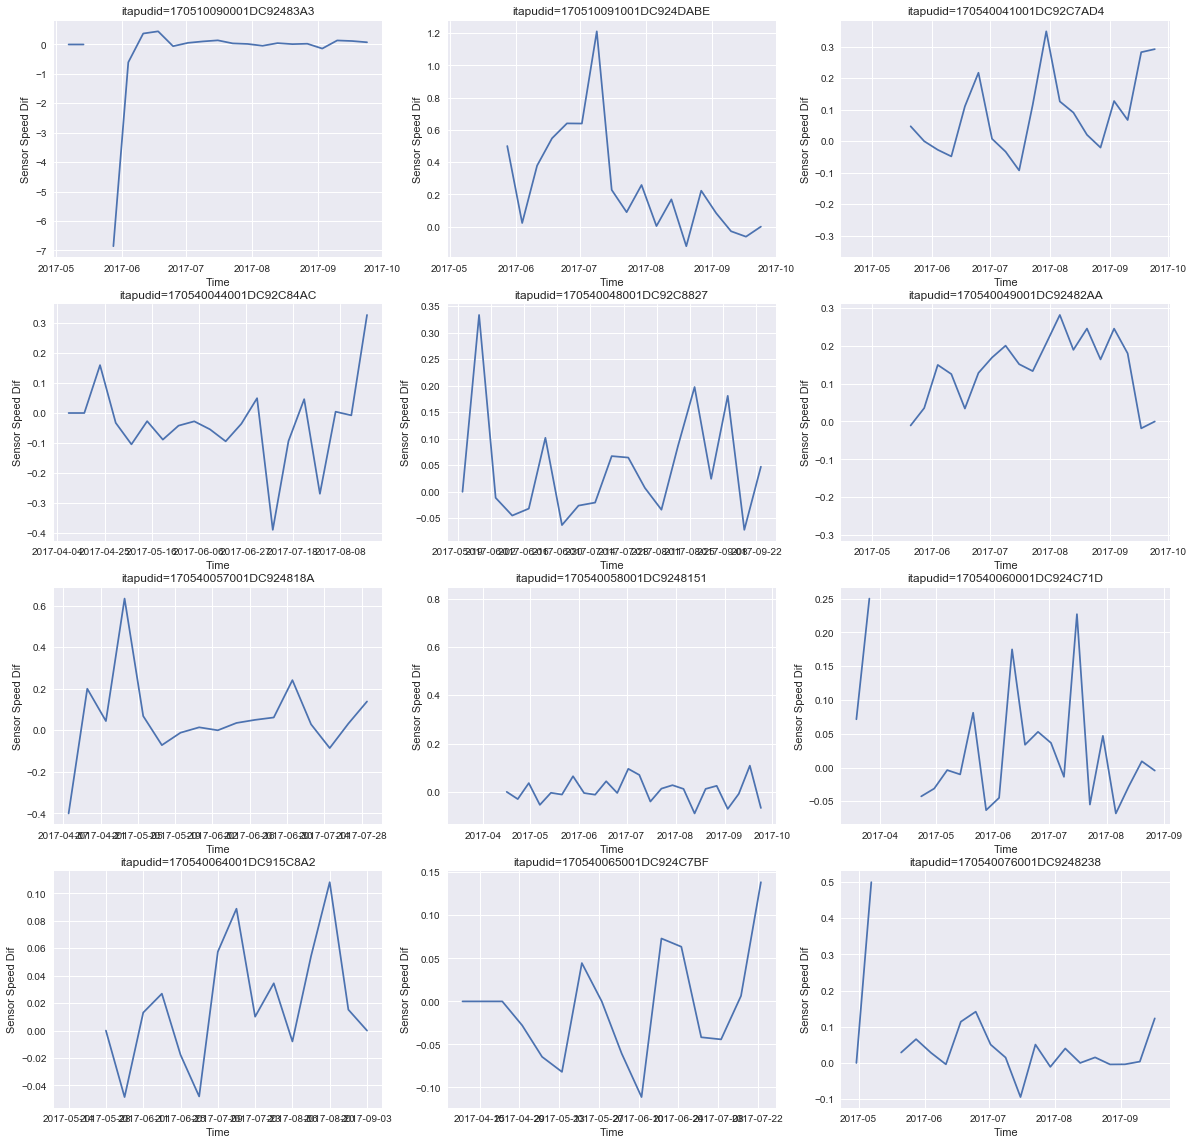

In [5]:
num = 1
plt.figure(figsize=(20, 20));
for i in itapudid:
    df1 = df[df['itapudid'] == i]
    df1 = df1.sort_values(['eventtime']).dropna(axis=0, how='any').reset_index(drop = True)
    df1 = df1[df1['eventtime']!='1970-01-01'].reset_index(drop = True)
    df1 = df1.set_index(pd.DatetimeIndex(df1['eventtime']))
    df1 = df1.resample("W").mean()
    df1 = df1[['max1stdetectwssc', 'max1stdetectwssd']]
    plt.subplot(4,3,num)
    plt.plot(df1.index.values, df1['max1stdetectwssc'] - df1['max1stdetectwssd'])
    plt.ylabel('Sensor Speed Dif')
    plt.xlabel('Time')
    plt.title('itapudid=%s' % (i))
    num += 1
plt.show()